**BIBLIOTECAS IMPORTADAS**

In [14]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOADING DATAFRAMES**

In [24]:
# carregando dataset
train =pd.read_csv("/content/drive/MyDrive/MESTRADO/CMP Aprendizado de Máquina/TRABALHO/DADOS ESSE/train_data (1).csv")
val =pd.read_csv("/content/drive/MyDrive/MESTRADO/CMP Aprendizado de Máquina/TRABALHO/DADOS ESSE/val_data (1).csv")
test = pd.read_csv("/content/drive/MyDrive/MESTRADO/CMP Aprendizado de Máquina/TRABALHO/DADOS ESSE/test_data (1).csv")


**DIVINDINDO TREINO, TESTE E VALIDAÇAO EM ATRIBUTOS (X) E TARGET (Y)**

In [25]:
# dividindo em treino e teste para treinamento do modelo
X_train = train.drop(['patient_id','date','label'], axis=1)
y_train = train['label']

X_val = val.drop(['patient_id','date','label'], axis=1)
y_val = val['label']

X_test = test.drop(['patient_id','date','label'], axis=1)
y_test = test['label']

In [26]:
def class_prob_apriori (model, X_train):
  # Número de instâncias por classe
  print("Número de instâncias por classe:", model.class_count_)

  # Probabilidade a priori das classes
  print("Probabilidades a priori:", model.class_prior_)

  # Médias das features por classe
  df_means = pd.DataFrame(model.theta_, columns=X_train.columns, index=model.classes_)
  print("\nMédias estimadas por classe:")
  display(df_means)

  # Variâncias das features por classe
  df_vars = pd.DataFrame(model.var_, columns=X_train.columns, index=nb.classes_)
  print("\nVariâncias estimadas por classe:")
  display(df_vars)

In [27]:
def smote (X, y):
  print(f"Distribuição original dos dados de treino: {Counter(y)}")
  smote = SMOTE(random_state=42)
  X_res, y_res = smote.fit_resample(X, y)
  print(f"Distribuição após SMOTE: {Counter(y_res)}")

In [28]:
def evaluate(model, X, y, set_name="set"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    acc = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, digits=4)
    cm = confusion_matrix(y, y_pred)

    print(f"\n-------------------------------------------- Avaliação no {set_name} -------------------------------------------\n")
    print("Accuracy:", acc)
    print("\nClassification report:\n", report)
    print("Confusion matrix:\n", cm)

    unique_classes = np.unique(y)
    if len(unique_classes) == 2 and y_proba is not None:
        auc = roc_auc_score(y, y_proba)
        print("\nROC AUC:", auc)
        fpr, tpr, thr = roc_curve(y, y_proba)
        plt.figure(figsize=(12, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        plt.plot([0,1],[0,1],"--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC curve - {set_name}")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    return {"accuracy": acc, "report_str": report, "confusion_matrix": cm}

# res_val = evaluate(best_model_fold, X_val, y_val, set_name="validation")

**TREINANDO MODELO APENAS COM DADOS DE TREINO**

**NAIVE BAYES NÃO BALANCEADO**

In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
class_prob_apriori(nb, X_train)

Número de instâncias por classe: [1844.  161.]
Probabilidades a priori: [0.91970075 0.08029925]

Médias estimadas por classe:


,Bathroom_count_sum,Bedroom_count_sum,Fridge Door_count_sum,Hallway_count_sum,Kitchen_count_sum,Lounge_count_sum,Door_count_sum,Bathroom_count_std,Bedroom_count_std,Fridge Door_count_std,...,Lounge_count_max,Door_count_max,Body Temperature,Body weight,Diastolic blood pressure,Heart rate,O/E - muscle mass,Skin Temperature,Systolic blood pressure,Total body water
0,0.447134,0.484547,0.413265,0.488610,0.517276,0.396119,0.367582,0.466622,0.496419,0.424983,...,0.416929,0.320833,0.651771,0.393274,0.401286,0.445693,0.303388,0.151053,0.459070,0.302550
1,0.474207,0.585239,0.485967,0.592361,0.620828,0.513378,0.433316,0.465916,0.581995,0.503314,...,0.482426,0.398398,0.864103,0.706584,0.736676,0.797202,0.599949,0.083336,0.880903,0.599366



Variâncias estimadas por classe:


,Bathroom_count_sum,Bedroom_count_sum,Fridge Door_count_sum,Hallway_count_sum,Kitchen_count_sum,Lounge_count_sum,Door_count_sum,Bathroom_count_std,Bedroom_count_std,Fridge Door_count_std,...,Lounge_count_max,Door_count_max,Body Temperature,Body weight,Diastolic blood pressure,Heart rate,O/E - muscle mass,Skin Temperature,Systolic blood pressure,Total body water
0,0.072452,0.074823,0.070384,0.075704,0.074275,0.088743,0.060188,0.068653,0.074591,0.064971,...,0.090388,0.051122,0.196320,0.227260,0.137959,0.161636,0.195006,0.122182,0.168708,0.194202
1,0.066193,0.061494,0.056270,0.058975,0.046918,0.086892,0.056705,0.058907,0.057388,0.054225,...,0.070777,0.059042,0.060383,0.188077,0.040635,0.029577,0.214326,0.072931,0.022293,0.214204



-------------------------------------------- Avaliação no train -------------------------------------------

Accuracy: 0.6398809523809523

Classification report:
               precision    recall  f1-score   support

           0     0.9949    0.6203    0.7641       316
           1     0.1367    0.9500    0.2390        20

    accuracy                         0.6399       336
   macro avg     0.5658    0.7851    0.5016       336
weighted avg     0.9438    0.6399    0.7329       336

Confusion matrix:
 [[196 120]
 [  1  19]]

ROC AUC: 0.7618670886075949


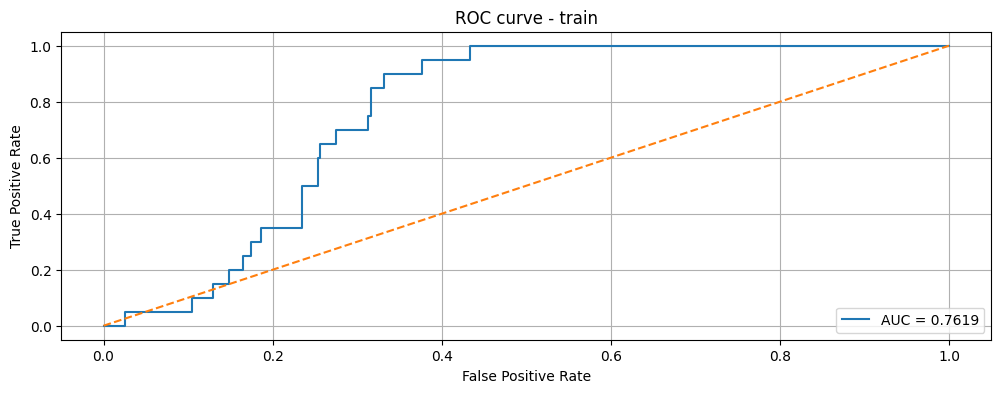

{'accuracy': 0.6398809523809523,
 'report_str': '              precision    recall  f1-score   support\n\n           0     0.9949    0.6203    0.7641       316\n           1     0.1367    0.9500    0.2390        20\n\n    accuracy                         0.6399       336\n   macro avg     0.5658    0.7851    0.5016       336\nweighted avg     0.9438    0.6399    0.7329       336\n',
 'confusion_matrix': array([[196, 120],
        [  1,  19]])}

In [41]:
evaluate(nb, X_val, y_val, set_name="train")

**NOVO TREINAMENTO DE DADOS APÓS APLICAÇAO DO SMOTE**

In [42]:
smote (X_train, y_train)

Distribuição original dos dados de treino: Counter({0: 1844, 1: 161})
Distribuição após SMOTE: Counter({1: 1844, 0: 1844})


In [43]:
nb_smote = GaussianNB()
nb_smote.fit(X_train, y_train)

GaussianNB()


-------------------------------------------- Avaliação no train -------------------------------------------

Accuracy: 0.6458333333333334

Classification report:
               precision    recall  f1-score   support

           0     0.9900    0.6297    0.7698       316
           1     0.1333    0.9000    0.2323        20

    accuracy                         0.6458       336
   macro avg     0.5617    0.7649    0.5010       336
weighted avg     0.9391    0.6458    0.7378       336

Confusion matrix:
 [[199 117]
 [  2  18]]

ROC AUC: 0.7441455696202532


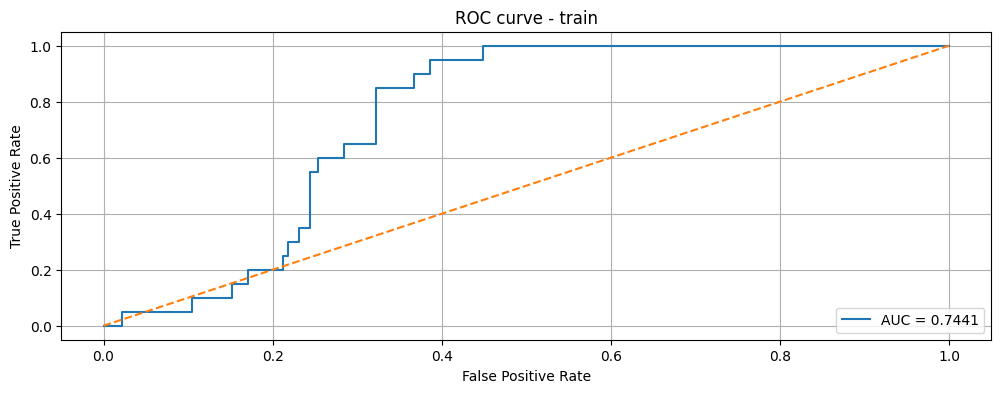

{'accuracy': 0.6458333333333334,
 'report_str': '              precision    recall  f1-score   support\n\n           0     0.9900    0.6297    0.7698       316\n           1     0.1333    0.9000    0.2323        20\n\n    accuracy                         0.6458       336\n   macro avg     0.5617    0.7649    0.5010       336\nweighted avg     0.9391    0.6458    0.7378       336\n',
 'confusion_matrix': array([[199, 117],
        [  2,  18]])}

In [44]:
evaluate(nb_smote, X_val, y_val, set_name="train")

**TREINAMENTO TREINO + VAL **

In [45]:
# Concatenate train and validation sets
X_train_val = pd.concat([X_train, X_val], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

smote (X_train_val, y_train_val)

Distribuição original dos dados de treino: Counter({0: 2160, 1: 181})
Distribuição após SMOTE: Counter({1: 2160, 0: 2160})


In [46]:
nb_train_val = GaussianNB()
nb_train_val.fit(X_train_val, y_train_val)

GaussianNB()


-------------------------------------------- Avaliação no train -------------------------------------------

Accuracy: 0.5164835164835165

Classification report:
               precision    recall  f1-score   support

           0     0.9188    0.4701    0.6220       385
           1     0.2093    0.7714    0.3293        70

    accuracy                         0.5165       455
   macro avg     0.5640    0.6208    0.4756       455
weighted avg     0.8096    0.5165    0.5770       455

Confusion matrix:
 [[181 204]
 [ 16  54]]

ROC AUC: 0.6466419294990724


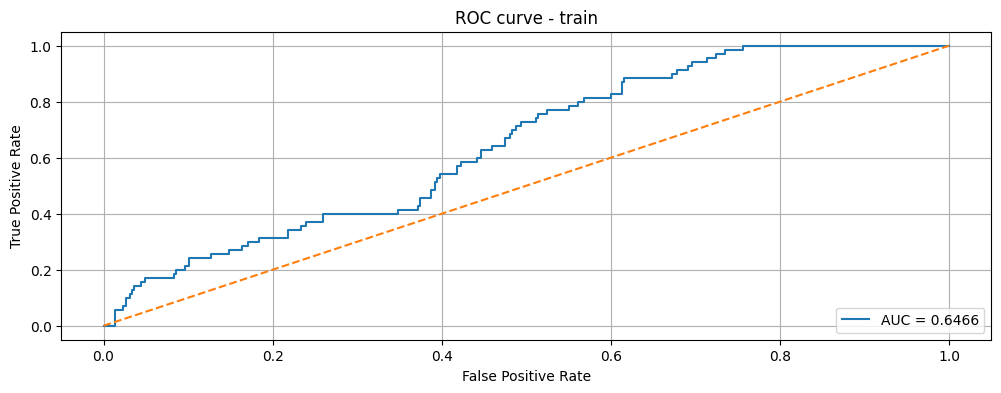

{'accuracy': 0.5164835164835165,
 'report_str': '              precision    recall  f1-score   support\n\n           0     0.9188    0.4701    0.6220       385\n           1     0.2093    0.7714    0.3293        70\n\n    accuracy                         0.5165       455\n   macro avg     0.5640    0.6208    0.4756       455\nweighted avg     0.8096    0.5165    0.5770       455\n',
 'confusion_matrix': array([[181, 204],
        [ 16,  54]])}

In [47]:
evaluate(nb_train_val, X_test, y_test, set_name="train")

**TREINAMENTO TREINO + VAL + TESTE**

In [48]:
# Concatenate train, validation, and test sets
X_train_val_test = pd.concat([X_train, X_val, X_test], ignore_index=True)
y_train_val_test = pd.concat([y_train, y_val, y_test], ignore_index=True)

smote (X_train_val_test, y_train_val_test)

Distribuição original dos dados de treino: Counter({0: 2545, 1: 251})
Distribuição após SMOTE: Counter({1: 2545, 0: 2545})


In [49]:
nb_train_val_test = GaussianNB()
nb_train_val_test.fit(X_train_val_test, y_train_val_test)

GaussianNB()


-------------------------------------------- Avaliação no train -------------------------------------------

Accuracy: 0.4725274725274725

Classification report:
               precision    recall  f1-score   support

           0     0.9240    0.4104    0.5683       385
           1     0.2007    0.8143    0.3220        70

    accuracy                         0.4725       455
   macro avg     0.5623    0.6123    0.4452       455
weighted avg     0.8127    0.4725    0.5305       455

Confusion matrix:
 [[158 227]
 [ 13  57]]

ROC AUC: 0.7180705009276438


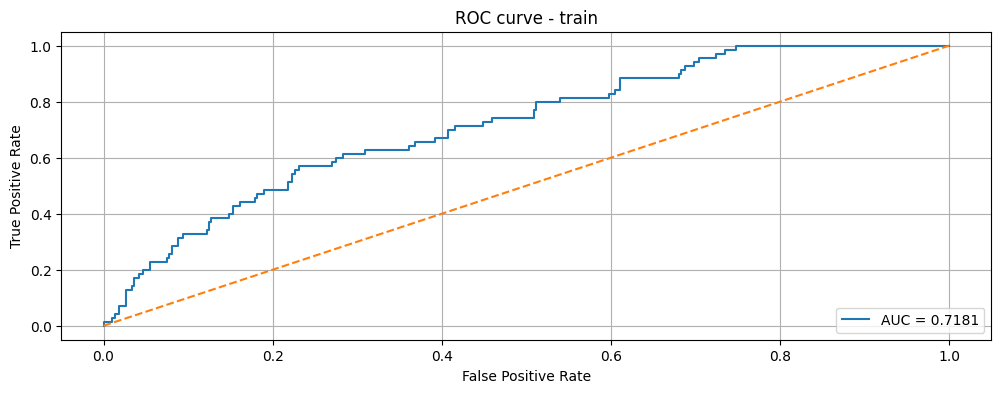

{'accuracy': 0.4725274725274725,
 'report_str': '              precision    recall  f1-score   support\n\n           0     0.9240    0.4104    0.5683       385\n           1     0.2007    0.8143    0.3220        70\n\n    accuracy                         0.4725       455\n   macro avg     0.5623    0.6123    0.4452       455\nweighted avg     0.8127    0.4725    0.5305       455\n',
 'confusion_matrix': array([[158, 227],
        [ 13,  57]])}

In [50]:
evaluate(nb_train_val_test, X_test, y_test, set_name="train")

In [57]:
import pickle

# Save the model
filename = '/content/drive/MyDrive/MESTRADO/CMP Aprendizado de Máquina/TRABALHO/DADOS ESSE/gaussian_nb_smote_combined.pkl'
pickle.dump(nb_train_val_test, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to /content/drive/MyDrive/MESTRADO/CMP Aprendizado de Máquina/TRABALHO/DADOS ESSE/gaussian_nb_smote_combined.pkl


**EXPLICABILIDADE**

  0%|          | 0/300 [00:00<?, ?it/s]

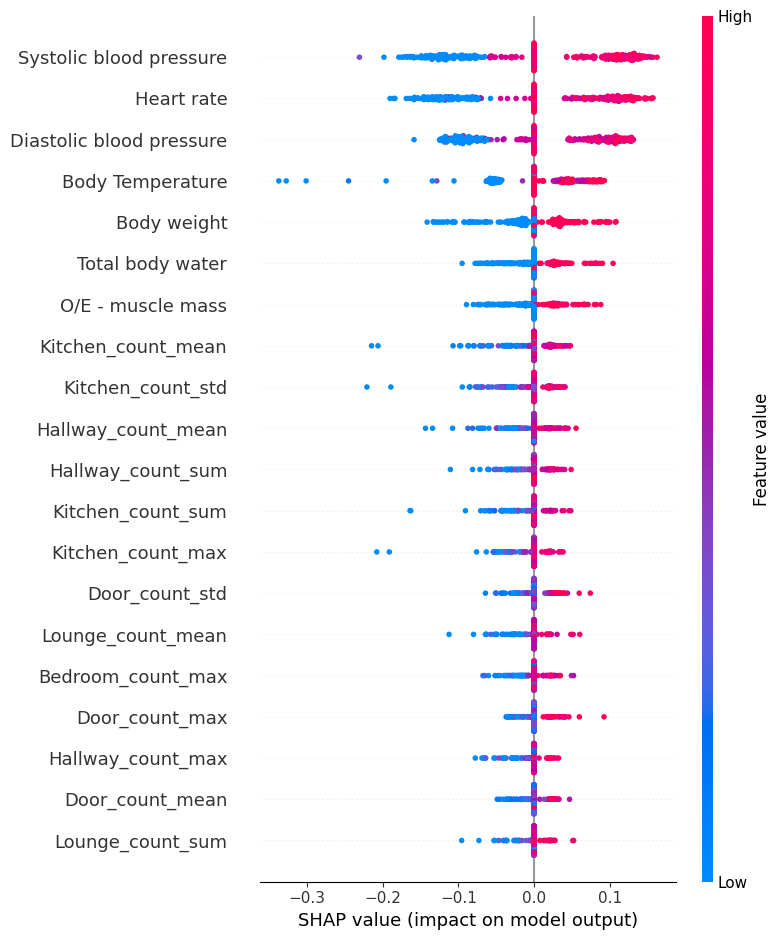

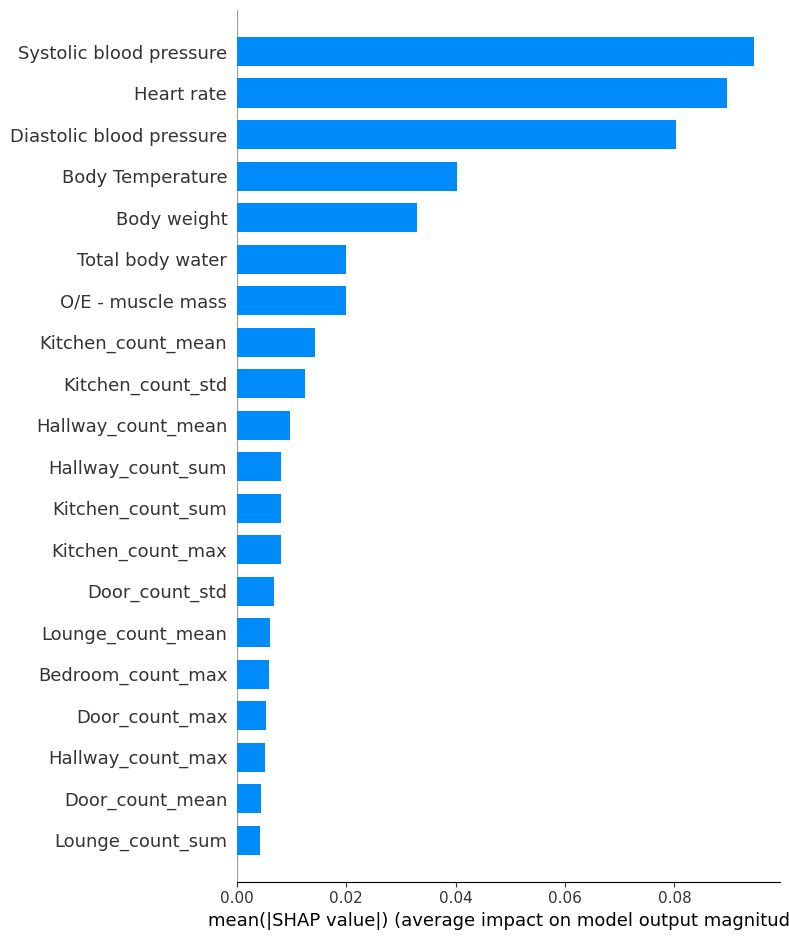

In [56]:
# Amostragem para reduzir custo computacional
import shap
# Sample background data from the combined dataset used for training
bg = shap.sample(X_train_val_test, 100, random_state=42)  # background (100 exemplos)
# Sample data to explain from the combined dataset used for training
X_sample = X_train_val_test.sample(n=min(300, len(X_train_val_test)), random_state=42)  # amostra de explicação


# Criação do KernelExplainer (suitable for non-linear models)
explainer = shap.KernelExplainer(
    nb_train_val_test.predict, # Use predict for binary classification
    bg, # Background data
    model_output="raw" # Use "raw" output for predict
)

# Cálculo dos valores SHAP
shap_values = explainer.shap_values(X_sample)

# Summary plot
plt.figure()
shap.summary_plot(shap_values, X_sample, show=False) # Use shap_values directly
plt.tight_layout()
plt.show()

# Bar plot
plt.figure()
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False) # Use shap_values directly
plt.tight_layout()
plt.show()